In [1]:
#import face_recognition as fr
from PIL import Image
from os import listdir
import matplotlib.pyplot as plt
import glob
import numpy as np
import re
import pandas as pd
import cv2
from os import remove
import collections
import operations
import operations_cutting
face_cascade = cv2.CascadeClassifier('gui_2/assets/haarcascade_frontalface_default.xml')
HEIGHT, WIDTH =48,48
other_emotions =  []
initial_emotions = ['sadness','happiness', 'surprise', 'neutral','fear', 'disgust','anger']

In [2]:
paths = ["../data/all/train/","../data/all/test/"]#["data/CK_cut/"]#["data/all/train/","data/all/test/"]# #["data/CK+/","data/fer/train/"]
# data  = listdir(path)
ignore = ["morralla",".DS_Store","contempt"]

### With operations module we can load all images in the paths provided. We can load in a single objet data for train only 1 model or in 2 combined models.

In [3]:
#Create Data object with all images in paths.
dataset= operations.Datos(paths,initial_emotions,48,48)
#Load image's directions
dataset.imgs_load_initial()
dataset.imgs_load_other()

True

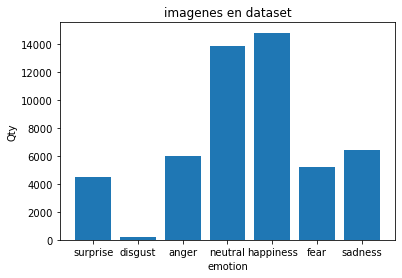

In [4]:
#Cantidad de datos por emocion
data = collections.Counter(dataset.state)
graph = plt.bar(data.keys(), data.values())   
plt.title('imagenes en dataset')
plt.xlabel('emotion')
plt.ylabel('Qty')
plt.show() #dibujamos el histograma

In [ ]:
data

In [ ]:
#Load images in a array
dataset.image_to_data()
dataset.image_to_data('other')
#Convert the images in gray and dimensions provided
dataset.data_conversion()
dataset.data_conversion('other')

In [ ]:
dataset.imgs.shape

In [ ]:
dataset.other_imgs.shape

In [ ]:
len(dataset.state)

## With operations_cutting we can load images cutted with cv2.cascadeClassifier

In [ ]:
dataset_cut = operations_cutting.Data_cut(paths,initial_emotions,48,48)

In [ ]:
dataset_cut.load_imgs()

In [ ]:
dataset_cut.recortar()

In [ ]:
dataset_cut.imgs.shape

In [ ]:
len(dataset_cut.state)

# Preparamos entrenamiento

In [ ]:
y=pd.DataFrame(dataset.state)
y_dummies = pd.get_dummies(y)

In [ ]:
y_dummies

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset.imgs,y_dummies)

In [ ]:
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten,BatchNormalization,Activation
from keras.layers import Dropout
from keras.layers.convolutional import Conv1D, Conv2D
from keras.layers.convolutional import MaxPooling1D,MaxPooling2D
from tensorflow.keras.optimizers import Adam, Nadam, SGD, Adamax
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from livelossplot.tf_keras import PlotLossesCallback
import keras

# MODELO 1

In [ ]:
model = Sequential()
# 1-conv
model.add(Conv2D(64,(3,3),padding='same',input_shape = (48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# 2-conv
model.add(Conv2D(128,(5,5),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# 3-conv
model.add(Conv2D(512,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# 4-conv
model.add(Conv2D(512,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())

model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(len(set(dataset.state)),activation='softmax'))

opt = Adam(learning_rate=0.0005)

model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
#model.summary()


# MODELO 2

In [ ]:
model = Sequential()
#model.add(Flatten())
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(imgs_array.shape[1:])))
model.add(MaxPooling1D(pool_size=2))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Conv1D(filters=256, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Conv1D(filters=512, kernel_size=3, activation='relu', input_shape=(imgs_array.shape[1:])))
model.add(MaxPooling1D(pool_size=2))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(64,activation = 'relu'))
model.add(Dense(128,activation = 'relu'))
model.add(Dense(256,activation = 'relu'))
model.add(Dense(512,activation = 'relu'))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(Dense(len(set(state), activation='softmax'))
opt = Adam(learning_rate=0.0005)
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics = ['accuracy'])

### Este codigo nos permite ver el progreso en tiempo real de los entrenamientos.

In [ ]:
# epochs = 200
# # steps_per_epoch = train_generator.n//train_generator.batch_size
# # validation_steps = validation_generator.n//validation_generator.batch_size

# checkpoint = ModelCheckpoint("modelo_ck_fc_tfeid_p1.h5",monitor='val_accuracy',
#                             save_weights_only=False,save_best_only=True, model='max',verbose=1)
# reduce_lr = ReduceLROnPlateau(monitor='val_loss',factor=0.1,patience=3,min_lr=0.000001,model='auto')

# callbacks = [PlotLossesCallback(),checkpoint,reduce_lr]
# history = model.fit(X_train,y_train,
#     epochs=epochs,
#     validation_data=(X_test,y_test),
#     callbacks=callbacks
# )

In [ ]:
from keras.models import Sequential, load_model, model_from_json
from keras import callbacks, optimizers
import tensorflow as tf
from datetime import date

fecha=str(date.today().year)+str(date.today().month)+str(date.today().day)    
symbol = 'no_dig_no_fear'
h5 = symbol + fecha + '_v1.h5'
checkpoint = callbacks.ModelCheckpoint(h5,
                                       monitor='loss',
                                       verbose=0,
                                       save_best_only=True,
                                       #save_weights_only=True,
                                       mode='auto',
                                       save_freq=1)
callback = [checkpoint]

modelo = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs = 5000,callbacks = callback,validation_split = 0.1)

## Operaciones para comprobar predicciones.

In [ ]:
paths = ["data/predict/"]
# data_pred  = listdir(path)
imgs_pred = []
state_pred = []
im_pred = {}

In [ ]:
for path in paths:
    for item in listdir(path):
        if item not in ignore:
            if item in initial_emotions:
                imgs_pred.extend([{"path": f"{path}{item}/{p}", "emotion": get_emotion(item,True)}for p in listdir(f"{path}{item}")])
                #state_pred.extend([item for p in listdir(f"{path}{item}")])



In [ ]:
len(imgs_pred)

In [ ]:
from keras.models import load_model

In [ ]:
#model = load_model('intial_emotions_2_20211116_v1.h5')

In [ ]:
imgs_pred_ = []
state_pred = []
for p in imgs_pred:
    temp = cv2.imread(p["path"],0)
    faces = face_cascade.detectMultiScale(temp, 1.05, 5)
    if len(faces)>0:
        for (x,y,w,h) in faces:
            recortada = temp[y:y+h, x:x+w]
            recortada = cv2.resize(recortada,(HEIGHT, WIDTH))
            imgs_pred_.append(recortada)
            state_pred.append(p["emotion"])
    
        
imgs_pred_ = [el/255 for el in imgs_pred_]
imgs_pred_ = np.array(imgs_pred_)
imgs_pred_= imgs_pred_.reshape((len(imgs_pred_),48,48,1))

In [ ]:
len(imgs_pred_)

In [ ]:
len(state_pred)

In [ ]:
prediction = model.predict(imgs_pred_)

In [ ]:
state_pred

In [ ]:
prediction[:5]

In [ ]:
prediction.argmax(axis = -1)


In [ ]:
cats= y_dummies.columns
cats = [x.replace("0_","") for x in cats]

In [ ]:
cats

In [ ]:
len(prediction)

In [ ]:
states_model = []
i=0
for i in range(len(prediction)):
    states_model.append(cats[prediction[i].argmax()])
    print(state_pred[i],cats[prediction[i].argmax()])

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(state_pred,states_model)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import seaborn as sns


In [ ]:
conf = confusion_matrix(states_model, state_pred)
conf = pd.DataFrame(conf,columns=cats, index=cats)

In [ ]:
plt.figure(figsize=(10,10))
heatmap = sns.heatmap(conf, annot=True)

